## 1. Dicom to Numpy aray

# EDA dữ liệu Brain Tumor

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut


def dicom2array(path, voi_lut=True, fix_monochrome=True):
    dicom = pydicom.read_file(path)
    # VOI LUT (if available by DICOM device) is used to
    # transform raw DICOM data to "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
    return dicom, data
        
    
def plot_img(img, size=(7, 7), is_rgb=True, title="", cmap='gray'):
    plt.figure(figsize=size)
    plt.imshow(img, cmap=cmap)
    plt.suptitle(title)
    plt.show()


def plot_imgs(imgs, cols=4, size=7, is_rgb=True, title="", cmap='gray', img_size=(500,500)):
    rows = len(imgs)//cols + 1
    fig = plt.figure(figsize=(cols*size, rows*size))
    for i, img in enumerate(imgs):
        if img_size is not None:
            img = cv2.resize(img, img_size)
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(img, cmap=cmap)
    plt.suptitle(title)
    plt.show()


## 2. Plot MRI images

In [2]:
dcm_root_path = "/media/tungthanhlee/DATA/brain-mri-tumor-dicom-masked"
dcm_paths = []

for subdir_name in os.listdir(dcm_root_path):
    subdir_path = os.path.join(dcm_root_path, subdir_name)
    for file_name in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, file_name)
        dcm_paths.append(file_path)
print("The total number of dicom files:", len(dcm_paths))

The total number of dicom files: 71852


Dicom 0: 
 Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 198
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.311.125282295065266504184867863002451722448
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.840.113747.20001115
(0002, 0013) Implementation Version Name         SH: ''
(0002, 0016) Source Application Entity Title     AE: 'VITREA1'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'ADC', 'ADC']
(0008, 0012) Instance Creation Date              DA: '19700101'
(0008, 0013) Instance Creation Time              TM: '100000'
(0008, 0016) SOP Class UID

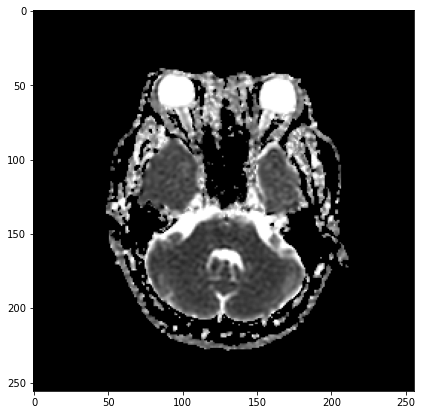

In [3]:
dcm, img = dicom2array(dcm_paths[1])
print(f"Dicom 0: \n", dcm)
plot_img(img)

In [5]:
print(f"Series Number: {dcm.SeriesNumber}")
print(f"Series Description: {dcm.SeriesDescription}")
print(f"Slice Thickness: {dcm.SliceThickness}")
print(f"Spacing Between Slices: {dcm.SpacingBetweenSlices}")
print(f"Sice ThLocation: {dcm.SliceLocation}")
print(f"Instance Number: {dcm.InstanceNumber}")
print(f"Image Position Patient: {dcm.ImagePositionPatient}")
print(f"Samples Per Pixel: {dcm.SamplesPerPixel}")
print(f"Rows: {dcm.Rows}")
print(f"Columns: {dcm.Columns}")
# Pixel Spacingdm.RowsPixelSpacingr"int(f"Rows"Window Centerc.Rows}WindowCenteri"nt(f"Rows:"Window WidthmRows})WindowWidth"
# print()f""SSmallest Image Pixel Value Ơ{dcm.SmallestImagePixelValue}
# print(f"SmaLargestage Pixel Value: {dcm.SmaLargestgePixelValue}")

Series Number: 700
Series Description: Apparent Diffusion Coefficient (mm2/s)
Slice Thickness: 5
Spacing Between Slices: 6
Sice ThLocation: -53.68361664
Instance Number: 3
Image Position Patient: [-129.086, -132.089, -46.8369]
Samples Per Pixel: 1
Rows: 256
Columns: 256


In [256]:
# study_path = '/media/tungthanhlee/DATA/brain-mri-tumor-dicom-masked/1.2.840.113619.6.410.92799438004935535719187645682270560917'

# depth = len(os.listdir(study_path))
# stack = np.empty((2512 2512 depth))
# r dcm_i, file in aos.enumerate(os.listdir(study_path))   sdcm_path = os.path.join(study_path, dcm_file)
#     dcm, img -= dicom2array(dcm_path)  
#     if 'T1' in dcm.SeriesDescription:          
#         k[:,:,i] = img  
# p(ltastack.shape

(512, 512, 707)


numpy.ndarray

In [1]:
# # Get the image shape and print it out
# height, width, depth = img.shape
# print(f"The image object has the following dimensions: height: {height}, width:{width}, depth:{depth}, channels:{channels}")

## 3. Explore label

In [2]:
folder_label = "/media/tungthanhlee/DATA/brain-mri-tumor-xml"
patient_folder = [os.path.join(folder_label, i) for i in os.listdir(folder_label)]
labels_path = []
for subdir in patient_folder:
    for label_name in os.listdir(subdir):
        label_path = os.path.join(subdir, label_name)
        labels_path.append(label_path)
print("The number of total labels:", len(labels_path))
print("Path of one label:", labels_path[0])

The number of total labels: 148
Path of one label: /media/tungthanhlee/DATA/brain-mri-tumor-xml/1.2.840.113619.6.388.101774739834280643528361334251926593124/labels.xml


In [3]:
import pandas_read_xml as pdx

df = pdx.read_xml(labels_path[5], ["study_query"])
df

,@xmlns:xsi,study
@date,http://www.w3.org/2001/XMLSchema-instance,2020-09-12 08:48:40
@modalityDicom,http://www.w3.org/2001/XMLSchema-instance,MR
@numInstances,http://www.w3.org/2001/XMLSchema-instance,
@numSeries,http://www.w3.org/2001/XMLSchema-instance,
@patientPid,http://www.w3.org/2001/XMLSchema-instance,YC4
@studyDescription,http://www.w3.org/2001/XMLSchema-instance,
diagnosis,http://www.w3.org/2001/XMLSchema-instance,"[{'id': '907032', 'type': 'transcript', 'readi..."
label,http://www.w3.org/2001/XMLSchema-instance,"[{'@sessionId': 'BSDIEP', '@type': 'local', '@..."
patient,http://www.w3.org/2001/XMLSchema-instance,"{'@id': '787554', '@pid': 'YC4', '@name': '', ..."


### patientPid


In [4]:
df["study"]["@patientPid"]

'YC4'

### diagnosis

In [5]:
df["study"]["diagnosis"]

[OrderedDict([('id', '907032'),
              ('type', 'transcript'),
              ('reading', '-<br />'),
              ('conclude', None)]),
 OrderedDict([('id', '907034'),
              ('type', 'transcript'),
              ('reading', '-<br />'),
              ('conclude', None)])]

In [6]:
diagnosis_list = []
for i in range(len(df["study"]["diagnosis"])):
    print(df["study"]["diagnosis"][i]["id"])
    diagnosis_list.append(df["study"]["diagnosis"][i]["id"])
diagnosis_list

907032
907034


['907032', '907034']

### label

In [7]:
type(df["study"]["label"])

list

In [8]:
df["study"]["label"]

[OrderedDict([('@sessionId', 'BSDIEP'),
              ('@type', 'local'),
              ('@annotation', '20'),
              ('@scope', ''),
              ('@pointUnit', 'mm'),
              ('@createTimestamp', '1610786567005'),
              ('@imageUid', ''),
              ('@seriesUid',
               '1.2.840.113619.2.388.57473.14165493.19589.1599871326.514'),
              ('@studyUid',
               '1.2.840.113619.6.388.110095587501191797057351369086052343769'),
              ('tags',
               OrderedDict([('value',
                             OrderedDict([('@name', 'Mass/Nodule')]))])),
              ('point',
               OrderedDict([('value',
                             [OrderedDict([('@x', '32.771999359131'),
                                           ('@y', '-24.319400787354'),
                                           ('@z', '-1.5712599754333')]),
                              OrderedDict([('@x', '47.808498382568'),
                                           

In [9]:
df["study"]["label"][0]

OrderedDict([('@sessionId', 'BSDIEP'),
             ('@type', 'local'),
             ('@annotation', '20'),
             ('@scope', ''),
             ('@pointUnit', 'mm'),
             ('@createTimestamp', '1610786567005'),
             ('@imageUid', ''),
             ('@seriesUid',
              '1.2.840.113619.2.388.57473.14165493.19589.1599871326.514'),
             ('@studyUid',
              '1.2.840.113619.6.388.110095587501191797057351369086052343769'),
             ('tags',
              OrderedDict([('value',
                            OrderedDict([('@name', 'Mass/Nodule')]))])),
             ('point',
              OrderedDict([('value',
                            [OrderedDict([('@x', '32.771999359131'),
                                          ('@y', '-24.319400787354'),
                                          ('@z', '-1.5712599754333')]),
                             OrderedDict([('@x', '47.808498382568'),
                                          ('@y', '-24.319400787

In [10]:
type(df["study"]["label"][0])

collections.OrderedDict

In [11]:
df["study"]["label"][0]

OrderedDict([('@sessionId', 'BSDIEP'),
             ('@type', 'local'),
             ('@annotation', '20'),
             ('@scope', ''),
             ('@pointUnit', 'mm'),
             ('@createTimestamp', '1610786567005'),
             ('@imageUid', ''),
             ('@seriesUid',
              '1.2.840.113619.2.388.57473.14165493.19589.1599871326.514'),
             ('@studyUid',
              '1.2.840.113619.6.388.110095587501191797057351369086052343769'),
             ('tags',
              OrderedDict([('value',
                            OrderedDict([('@name', 'Mass/Nodule')]))])),
             ('point',
              OrderedDict([('value',
                            [OrderedDict([('@x', '32.771999359131'),
                                          ('@y', '-24.319400787354'),
                                          ('@z', '-1.5712599754333')]),
                             OrderedDict([('@x', '47.808498382568'),
                                          ('@y', '-24.319400787

In [12]:
df["study"]["label"][0].keys()

odict_keys(['@sessionId', '@type', '@annotation', '@scope', '@pointUnit', '@createTimestamp', '@imageUid', '@seriesUid', '@studyUid', 'tags', 'point'])

In [13]:
df["study"]["label"][0].values()

odict_values(['BSDIEP', 'local', '20', '', 'mm', '1610786567005', '', '1.2.840.113619.2.388.57473.14165493.19589.1599871326.514', '1.2.840.113619.6.388.110095587501191797057351369086052343769', OrderedDict([('value', OrderedDict([('@name', 'Mass/Nodule')]))]), OrderedDict([('value', [OrderedDict([('@x', '32.771999359131'), ('@y', '-24.319400787354'), ('@z', '-1.5712599754333')]), OrderedDict([('@x', '47.808498382568'), ('@y', '-24.319400787354'), ('@z', '-1.5712599754333')]), OrderedDict([('@x', '47.808498382568'), ('@y', '-12.551699638367'), ('@z', '-1.5712599754333')]), OrderedDict([('@x', '32.771999359131'), ('@y', '-12.551699638367'), ('@z', '-1.5712599754333')]), OrderedDict([('@x', '28.84939956665'), ('@y', '-29.549499511719'), ('@z', '16.428699493408')]), OrderedDict([('@x', '61.537498474121'), ('@y', '-29.549499511719'), ('@z', '16.428699493408')]), OrderedDict([('@x', '61.537498474121'), ('@y', '5.7535800933838'), ('@z', '16.428699493408')]), OrderedDict([('@x', '28.8493995666

In [14]:
df["study"]["label"][0]["point"]["value"][0]

OrderedDict([('@x', '32.771999359131'),
             ('@y', '-24.319400787354'),
             ('@z', '-1.5712599754333')])

In [15]:
df["study"]["label"][0]["tags"]["value"]["@name"]

'Mass/Nodule'

In [16]:
len(df["study"]["label"][0]["tags"]["value"])

1

In [17]:
# Point (x, y, z)
df["study"]["label"][0]["point"]

OrderedDict([('value',
              [OrderedDict([('@x', '32.771999359131'),
                            ('@y', '-24.319400787354'),
                            ('@z', '-1.5712599754333')]),
               OrderedDict([('@x', '47.808498382568'),
                            ('@y', '-24.319400787354'),
                            ('@z', '-1.5712599754333')]),
               OrderedDict([('@x', '47.808498382568'),
                            ('@y', '-12.551699638367'),
                            ('@z', '-1.5712599754333')]),
               OrderedDict([('@x', '32.771999359131'),
                            ('@y', '-12.551699638367'),
                            ('@z', '-1.5712599754333')]),
               OrderedDict([('@x', '28.84939956665'),
                            ('@y', '-29.549499511719'),
                            ('@z', '16.428699493408')]),
               OrderedDict([('@x', '61.537498474121'),
                            ('@y', '-29.549499511719'),
                       

In [18]:
len(df["study"]["label"][0])

11

In [19]:
# x-axis
df["study"]["label"][0]["point"]["value"][0]["@x"]

'32.771999359131'

In [20]:
key_columns = ['@patientPid', 'diagnosis', '@sessionId', '@type', '@annotation', '@scope', '@pointUnit', '@createTimestamp', '@imageUid', '@seriesUid', '@studyUid', 'tags', 'point']


# Extract information from 1 file .xml

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import pandas_read_xml as pdx
from pydicom.pixel_data_handlers.util import apply_voi_lut
from collections import OrderedDict


folder_label = "/media/tungthanhlee/DATA/brain-mri-tumor-xml"
patient_folder = [os.path.join(folder_label, i) for i in os.listdir(folder_label)]
labels_path = []
for subdir in patient_folder:
    for label_name in os.listdir(subdir):
        label_path = os.path.join(subdir, label_name)
        labels_path.append(label_path)
print("The number of total labels:", len(labels_path))
print(labels_path[0])


The number of total labels: 148
/media/tungthanhlee/DATA/brain-mri-tumor-xml/1.2.840.113619.6.388.101774739834280643528361334251926593124/labels.xml


In [22]:
df = pdx.read_xml(labels_path[5], ["study_query"])

name_xml_list = []
patientPid_list = []
diagnosis_list = []
sessionId_list = []
type_list = []
annotation_list = []
scope_list = []
pointUnit_list = []
createTimestamp_list = []
imageUid_list = []
seriesUid_list = []
studyUid_list = []
tags_list = []
point_list = []

for idx1 in range(len(df["study"]["label"])):
    name_xml = labels_path[5].split('/')[-2]
    name_xml_list.append(name_xml)
    obj = df["study"]["label"][idx1]
    # point_list
    sub_points = []
    if not obj["point"] == None: 
        if not obj["point"]["value"] == None:
            if len(obj["point"]["value"]) == 1:
                    x = np.float(obj["point"]["value"][0]["@x"])
                    y = np.float(obj["point"]["value"][0]["@y"])
                    z = np.float(obj["point"]["value"][0]["@z"])
                    one_point.append(x)
                    one_point.append(y)
                    one_point.append(z)
                    sub_points.append(one_point)
            else:
                for i in range(12):
                    one_point = []
                    x = np.float(obj["point"]["value"][i]["@x"])
                    y = np.float(obj["point"]["value"][i]["@y"])
                    z = np.float(obj["point"]["value"][i]["@z"])
                    one_point.append(x)
                    one_point.append(y)
                    one_point.append(z)
                    sub_points.append(one_point)
            if not sub_points == []:
                point_list.append(sub_points)
                # patientPid_list
                patientPid_list.append(df["study"]["@patientPid"])
                # diagnosis_list
                diagnosis_sub = []
                for idx2 in range(len(df["study"]["diagnosis"])):
                    diagnosis_sub.append(df["study"]["diagnosis"][idx2]["id"])
                diagnosis_list.append(diagnosis_sub)
                # sessionId_list
                sessionId_list.append(obj["@sessionId"])
                # type_list
                type_list.append(obj["@type"])
                # annotation_list
                annotation_list.append(obj["@annotation"])
                # scope_list
                scope_list.append(obj["@scope"])
                # pointUnit_list
                pointUnit_list.append(obj["@pointUnit"])
                # createTimestamp
                createTimestamp_list.append(obj["@createTimestamp"])
                # imageUid_list 
                imageUid_list.append(obj["@imageUid"])
                # seriesUid_list
                seriesUid_list.append(obj["@seriesUid"])
                # studyUid_list
                studyUid_list.append(obj["@studyUid"])
                # tags_list: 
                if len(obj["tags"]["value"]) == 1:
                    tags_list.append(obj["tags"]["value"]["@name"])
                else: # tags have more than 1
                    sub_tags_list = []
                    print(len(obj["tags"]["value"]))
                    for l in range(len(obj["tags"]["value"])):   
                        sub_tags_list.append(obj["tags"]["value"][l]["@name"])
                    tags_list.append(sub_tags_list)


# print(len(patientPid_list))
# print(len(diagnosis_list))
# print(len(sessionId_list))
# print(len(type_list))
# print(len(annotation_list))
# print(len(scope_list))
# print(len(pointUnit_list))
# print(len(createTimestamp_list))
# print(len(imageUid_list))
# print(len(seriesUid_list))
# print(len(studyUid_list))
# print(len(tags_list))
# print(len(point_list))
print("*"*100)
print("name_xml_list:\n", name_xml_list)
print("patientPid_list:\n", patientPid_list)
print("diagnosis_list:\n", diagnosis_list)
print("sessionId_list:\n", sessionId_list)
print("type_list:\n", type_list)
print("annotation_list:\n", annotation_list)
print("scope_list:\n", scope_list)
print("pointUnit_list:\n", pointUnit_list)
print("createTimestamp_list:\n", createTimestamp_list)
print("imageUid_list:\n", imageUid_list)
print("seriesUid_list:\n", seriesUid_list)
print("studyUid_list:\n", studyUid_list)
print("tags_list:\n", tags_list)
print("point_list:\n", point_list)

****************************************************************************************************
name_xml_list:
 ['1.2.840.113619.6.388.110095587501191797057351369086052343769', '1.2.840.113619.6.388.110095587501191797057351369086052343769', '1.2.840.113619.6.388.110095587501191797057351369086052343769', '1.2.840.113619.6.388.110095587501191797057351369086052343769']
patientPid_list:
 ['YC4', 'YC4', 'YC4']
diagnosis_list:
 [['907032', '907034'], ['907032', '907034'], ['907032', '907034']]
sessionId_list:
 ['BSDIEP', 'BSDIEP', 'BSDIEP']
type_list:
 ['local', 'local', 'local']
annotation_list:
 ['20', '20', '20']
scope_list:
 ['', '', '']
pointUnit_list:
 ['mm', 'mm', 'mm']
createTimestamp_list:
 ['1610786567005', '1610786615448', '1610786675676']
imageUid_list:
 ['', '', '']
seriesUid_list:
 ['1.2.840.113619.2.388.57473.14165493.19589.1599871326.514', '1.2.840.113619.2.388.57473.14165493.19589.1599871326.514', '1.2.840.113619.2.388.57473.14165493.19589.1599871326.514']
studyUid_list

# Extract information from folder .xml

In [23]:
xml_name_list = []
patientPid_list = []
diagnosis_list = []
sessionId_list = []
type_list = []
annotation_list = []
scope_list = []
pointUnit_list = []
createTimestamp_list = []
imageUid_list = []
seriesUid_list = []
studyUid_list = []
tags_list = []
point_list = []

for j in range(len(labels_path)):
    df = pdx.read_xml(labels_path[j], ["study_query"])

    for idx1 in range(len(df["study"]["label"])):
        try:

            name_xml = labels_path[j].split('/')[-2]
            obj = df["study"]["label"][idx1]
            # point_list
            sub_points = []
            if obj["point"] == None:
                sub_points.append("None")
            elif obj["point"]["value"] == None:
                sub_points.append("None")
            else:
                if len(obj["point"]["value"]) == 1:
                    x = np.float(obj["point"]["value"][0]["@x"])
                    y = np.float(obj["point"]["value"][0]["@y"])
                    z = np.float(obj["point"]["value"][0]["@z"])
                    one_point.append(x)
                    one_point.append(y)
                    one_point.append(z)
                    sub_points.append(one_point)
                else:
                    for i in range(len(obj["point"]["value"])):
                        one_point = []
                        x = np.float(obj["point"]["value"][i]["@x"])
                        y = np.float(obj["point"]["value"][i]["@y"])
                        z = np.float(obj["point"]["value"][i]["@z"])
                        one_point.append(x)
                        one_point.append(y)
                        one_point.append(z)
                        sub_points.append(one_point)
            # xml_name_list 
            xml_name_list.append(name_xml)
            # point_list
            point_list.append(sub_points)
            # patientPid_list
            patientPid_list.append(df["study"]["@patientPid"])
            # diagnosis_list
            diagnosis_sub = []
            for idx2 in range(len(df["study"]["diagnosis"])):
                diagnosis_sub.append(df["study"]["diagnosis"][idx2]["id"])
            diagnosis_list.append(diagnosis_sub)
            # sessionId_list
            sessionId_list.append(obj["@sessionId"])
            # type_list
            type_list.append(obj["@type"])
            # annotation_list
            annotation_list.append(obj["@annotation"])
            # scope_list
            scope_list.append(obj["@scope"])
            # pointUnit_list
            pointUnit_list.append(obj["@pointUnit"])
            # createTimestamp
            createTimestamp_list.append(obj["@createTimestamp"])
            # imageUid_list 
            imageUid_list.append(obj["@imageUid"])
            # seriesUid_list
            seriesUid_list.append(obj["@seriesUid"])
            # studyUid_list
            studyUid_list.append(obj["@studyUid"])
            # tags_list: 
            if len(obj["tags"]["value"]) == 1:
                tags_list.append(obj["tags"]["value"]["@name"])
            else: # tags have more than 1
                sub_tags_list = []
                for l in range(len(obj["tags"]["value"])):   
                    sub_tags_list.append(obj["tags"]["value"][l]["@name"])
                tags_list.append(sub_tags_list)

        except Exception as e:
            print(e)

print("*"*99)
print(len(xml_name_list))
print(len(patientPid_list))
print(len(diagnosis_list))
print(len(sessionId_list))
print(len(type_list))
print(len(annotation_list))
print(len(scope_list))
print(len(pointUnit_list))
print(len(createTimestamp_list))
print(len(imageUid_list))
print(len(seriesUid_list))
print(len(studyUid_list))
print(len(tags_list))
print(len(point_list))

0
0
0
***************************************************************************************************
512
512
512
512
512
512
512
512
512
512
512
512
512
512


# Export dataframe to file csv, xlsx, pickle

In [24]:
import pandas as pd

data = {'xml_name': xml_name_list,
        'patientPid': patientPid_list,
        'diagnosis': diagnosis_list,  
        'sessionId': sessionId_list,
        'type': type_list,
        'annotation': annotation_list,
        'scope': scope_list,
        'pointUnit': pointUnit_list,
        'createTimestamp': createTimestamp_list,
        'imageUid': imageUid_list,
        'seriesUid': seriesUid_list,
        'studyUid': studyUid_list,
        'tags': tags_list,
        'point': point_list
        }

cols = ['xml_name', 'patientPid', 'diagnosis', 'sessionId', 'type', 'annotation', 'scope', 'pointUnit', 'createTimestamp', 'imageUid', 'seriesUid', 'studyUid', 'tags', 'point']
dfame = pd.DataFrame(data, columns=cols)

# dfame = pd.DataFrame(data, columns=['patientPid', 'diagnosis', 'tags', 'point'])
## dfame.to_csv('//media/tungthanhlee/DATA/brain-mri-edasummary/summary.csv')

In [25]:
dfame.to_excel('/media/tungthanhlee/DATA/brain-mri-eda/summary.xlsx')

In [26]:
dfame.to_pickle('/media/tungthanhlee/DATA/brain-mri-eda/summary.pkl')

In [27]:
dfame

,xml_name,patientPid,diagnosis,sessionId,type,annotation,scope,pointUnit,createTimestamp,imageUid,seriesUid,studyUid,tags,point
0,1.2.840.113619.6.388.1017747398342806435283613...,YC21,"[908910, 908912]",BSDIEP,local,20,,mm,1610884981375,,1.2.840.113619.2.388.57473.14165493.12654.1599...,1.2.840.113619.6.388.1017747398342806435283613...,Mass/Nodule,"[[-12.035799980164, -70.509002685547, -40.1687..."
1,1.2.840.113619.6.388.1017747398342806435283613...,YC21,"[908910, 908912]",BSDIEP,local,20,,mm,1610885017001,,1.2.840.113619.2.388.57473.14165493.12654.1599...,1.2.840.113619.6.388.1017747398342806435283613...,Cerebral edema,"[[-46.030101776123, -54.770900726318, -36.5686..."
2,1.2.840.113619.6.388.1017747398342806435283613...,YC21,"[908910, 908912]",BSDIEP,local,20,,mm,1610885075681,,1.2.840.113619.2.388.57473.14165493.12654.1599...,1.2.840.113619.6.388.1017747398342806435283613...,Midline shift,"[[-0.074838802218437, -44.698501586914, -18.56..."
3,1.2.840.113619.6.388.1017747398342806435283613...,YC21,"[908910, 908912]",BSDIEP,global,-1,series,,1610885136683,,1.2.840.113619.2.388.57473.14165493.12654.1599...,1.2.840.113619.6.388.1017747398342806435283613...,Meningioma,[None]
4,1.2.840.113619.6.388.1067388807510514152787160...,23 BHK,"[841808, 841810]",BSDIEP,local,20,,mm,1607483610460,,1.2.840.113619.2.388.57473.14165493.13177.1591...,1.2.840.113619.6.388.1067388807510514152787160...,Mass/Nodule,"[[-1.3457000255585, -22.289400100708, -15.3137..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,1.2.840.113619.6.410.6718953729125917342083405...,DV P57,"[912482, 912484]",BSDIEP,global,-1,series,,1611441661993,,1.2.840.113619.2.410.15512023.5814788.13131.15...,1.2.840.113619.6.410.6718953729125917342083405...,"[Cerebral tumor, Cerebral vascular disease]",[None]
508,1.2.840.113619.6.410.7201826919570282850193720...,DV F23,"[906048, 906050]",BSDIEP,local,20,,mm,1610726793465,,1.2.840.113619.2.410.15512023.5814788.13104.16...,1.2.840.113619.6.410.7201826919570282850193720...,Mass/Nodule,"[[-11.559499740601, -5.1256899833679, -56.9049..."
509,1.2.840.113619.6.410.7201826919570282850193720...,DV F23,"[906048, 906050]",BSDIEP,global,-1,series,,1610726821329,,1.2.840.113619.2.410.15512023.5814788.13104.16...,1.2.840.113619.6.410.7201826919570282850193720...,Pituitary adenoma,[None]
510,1.2.840.113619.6.410.9279943800493553571918764...,DV F57,"[913340, 913342]",BSDIEP,local,20,,mm,1611481704955,,1.2.840.113619.2.410.15512023.5814788.28593.15...,1.2.840.113619.6.410.9279943800493553571918764...,Mass/Nodule,"[[-22.561500549316, 18.221099853516, -40.00730..."


In [28]:
print(f"Unique values of column type:\n", dfame["type"].unique())

Unique values of column type:
 ['local' 'global']


## Extract rows have tags which are equal 'global' 

In [29]:
df_global = dfame[dfame["type"] == "global"]
df_global = df_global.reset_index()
df_global

,index,xml_name,patientPid,diagnosis,sessionId,type,annotation,scope,pointUnit,createTimestamp,imageUid,seriesUid,studyUid,tags,point
0,3,1.2.840.113619.6.388.1017747398342806435283613...,YC21,"[908910, 908912]",BSDIEP,global,-1,series,,1610885136683,,1.2.840.113619.2.388.57473.14165493.12654.1599...,1.2.840.113619.6.388.1017747398342806435283613...,Meningioma,[None]
1,5,1.2.840.113619.6.388.1067388807510514152787160...,23 BHK,"[841808, 841810]",BSDIEP,global,-1,series,,1607483647730,,1.2.840.113619.2.388.57473.14165493.13177.1591...,1.2.840.113619.6.388.1067388807510514152787160...,Pituitary adenoma,[None]
2,14,1.2.840.113619.6.388.1081120408802499059158946...,YC11,"[914778, 914780]",BSDIEP,global,-1,series,,1611612229880,,1.2.840.113619.2.388.57473.14165493.12404.1597...,1.2.840.113619.6.388.1081120408802499059158946...,"[Sinus disease, Cerebral tumor, Intracranial m...",[None]
3,16,1.2.840.113619.6.388.1085857506259653239604053...,YC63,"[889934, 889936]",BSDIEP,global,-1,series,,1609206874365,,1.2.840.113619.2.388.57473.14165493.13307.1595...,1.2.840.113619.6.388.1085857506259653239604053...,Cavernoma,[None]
4,20,1.2.840.113619.6.388.1086680686963790084220790...,DV 63,"[841576, 841578]",BSDIEP,global,-1,series,,1607479639458,,1.2.840.113619.2.388.57473.14165493.12954.1590...,1.2.840.113619.6.388.1086680686963790084220790...,Glioma,[None]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,500,1.2.840.113619.6.410.3703626307294449374407781...,DV F6,"[912576, 912578]",BSDIEP,global,-1,series,,1611444603106,,1.2.840.113619.2.410.15512023.5814788.13143.15...,1.2.840.113619.6.410.3703626307294449374407781...,"[Cerebral tumor, Intracranial metastasis]",[None]
148,504,1.2.840.113619.6.410.6640772753983381136153803...,BHQH CC,"[911252, 911254]",BSDIEP,global,-1,series,,1611243632863,,1.2.840.113619.2.410.15512023.5814788.13178.16...,1.2.840.113619.6.410.6640772753983381136153803...,Cerebral tumor,[None]
149,507,1.2.840.113619.6.410.6718953729125917342083405...,DV P57,"[912482, 912484]",BSDIEP,global,-1,series,,1611441661993,,1.2.840.113619.2.410.15512023.5814788.13131.15...,1.2.840.113619.6.410.6718953729125917342083405...,"[Cerebral tumor, Cerebral vascular disease]",[None]
150,509,1.2.840.113619.6.410.7201826919570282850193720...,DV F23,"[906048, 906050]",BSDIEP,global,-1,series,,1610726821329,,1.2.840.113619.2.410.15512023.5814788.13104.16...,1.2.840.113619.6.410.7201826919570282850193720...,Pituitary adenoma,[None]


In [30]:
for i in range(len(df_global["tags"])):
    print(i)
    print(df_global["tags"][i])
    print('-'*39)

0
Meningioma
---------------------------------------
1
Pituitary adenoma
---------------------------------------
2
['Sinus disease', 'Cerebral tumor', 'Intracranial metastasis']
---------------------------------------
3
Cavernoma
---------------------------------------
4
Glioma
---------------------------------------
5
Glioma
---------------------------------------
6
Other tumor
---------------------------------------
7
['Cerebral tumor', 'Acute ischemic stroke']
---------------------------------------
8
['Lymphoma', 'Other tumor']
---------------------------------------
9
Cerebral tumor
---------------------------------------
10
['Sinus disease', 'Neurinoma']
---------------------------------------
11
Lymphoma
---------------------------------------
12
Pituitary adenoma
---------------------------------------
13
Glioma
---------------------------------------
14
Other tumor
---------------------------------------
15
Cerebral tumor
---------------------------------------
16
['Sinus dise

In [31]:
labels = ['Other tumor', 'Glioma', 'Meningioma', 'Pituitary adenoma', 'Cerebral tumor', 'Neurinoma', 'Cavernoma', 'Lymphoma', 'Chordoma']

for i in range(len(df_global['tags'])):
    if type(df_global['tags'][i])==str:
        if not df_global['tags'][i] in labels:
            print(i)
            print(df_global['tags'][i])
            df_global['tags'][i] = None
    elif type(df_global['tags'][i])==list:
        for j in range(len(df_global['tags'][i])):
            if df_global['tags'][i][j] in labels:
                # print(df_global['tags'][i][j])
                df_global['tags'][i] = df_global['tags'][i][j]
df_global

98
Sinus disease
115
Cystic mass
124
Sinus disease
<ipython-input-31-01f810f8a575>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_global['tags'][i] = df_global['tags'][i][j]
<ipython-input-31-01f810f8a575>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_global['tags'][i] = None


,index,xml_name,patientPid,diagnosis,sessionId,type,annotation,scope,pointUnit,createTimestamp,imageUid,seriesUid,studyUid,tags,point
0,3,1.2.840.113619.6.388.1017747398342806435283613...,YC21,"[908910, 908912]",BSDIEP,global,-1,series,,1610885136683,,1.2.840.113619.2.388.57473.14165493.12654.1599...,1.2.840.113619.6.388.1017747398342806435283613...,Meningioma,[None]
1,5,1.2.840.113619.6.388.1067388807510514152787160...,23 BHK,"[841808, 841810]",BSDIEP,global,-1,series,,1607483647730,,1.2.840.113619.2.388.57473.14165493.13177.1591...,1.2.840.113619.6.388.1067388807510514152787160...,Pituitary adenoma,[None]
2,14,1.2.840.113619.6.388.1081120408802499059158946...,YC11,"[914778, 914780]",BSDIEP,global,-1,series,,1611612229880,,1.2.840.113619.2.388.57473.14165493.12404.1597...,1.2.840.113619.6.388.1081120408802499059158946...,Cerebral tumor,[None]
3,16,1.2.840.113619.6.388.1085857506259653239604053...,YC63,"[889934, 889936]",BSDIEP,global,-1,series,,1609206874365,,1.2.840.113619.2.388.57473.14165493.13307.1595...,1.2.840.113619.6.388.1085857506259653239604053...,Cavernoma,[None]
4,20,1.2.840.113619.6.388.1086680686963790084220790...,DV 63,"[841576, 841578]",BSDIEP,global,-1,series,,1607479639458,,1.2.840.113619.2.388.57473.14165493.12954.1590...,1.2.840.113619.6.388.1086680686963790084220790...,Glioma,[None]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,500,1.2.840.113619.6.410.3703626307294449374407781...,DV F6,"[912576, 912578]",BSDIEP,global,-1,series,,1611444603106,,1.2.840.113619.2.410.15512023.5814788.13143.15...,1.2.840.113619.6.410.3703626307294449374407781...,Cerebral tumor,[None]
148,504,1.2.840.113619.6.410.6640772753983381136153803...,BHQH CC,"[911252, 911254]",BSDIEP,global,-1,series,,1611243632863,,1.2.840.113619.2.410.15512023.5814788.13178.16...,1.2.840.113619.6.410.6640772753983381136153803...,Cerebral tumor,[None]
149,507,1.2.840.113619.6.410.6718953729125917342083405...,DV P57,"[912482, 912484]",BSDIEP,global,-1,series,,1611441661993,,1.2.840.113619.2.410.15512023.5814788.13131.15...,1.2.840.113619.6.410.6718953729125917342083405...,Cerebral tumor,[None]
150,509,1.2.840.113619.6.410.7201826919570282850193720...,DV F23,"[906048, 906050]",BSDIEP,global,-1,series,,1610726821329,,1.2.840.113619.2.410.15512023.5814788.13104.16...,1.2.840.113619.6.410.7201826919570282850193720...,Pituitary adenoma,[None]


In [32]:
# Remove 3 rows have not tags which in labels
indexNames = [98, 115, 124]
df_global.drop(indexNames, inplace=True)
df_global


,index,xml_name,patientPid,diagnosis,sessionId,type,annotation,scope,pointUnit,createTimestamp,imageUid,seriesUid,studyUid,tags,point
0,3,1.2.840.113619.6.388.1017747398342806435283613...,YC21,"[908910, 908912]",BSDIEP,global,-1,series,,1610885136683,,1.2.840.113619.2.388.57473.14165493.12654.1599...,1.2.840.113619.6.388.1017747398342806435283613...,Meningioma,[None]
1,5,1.2.840.113619.6.388.1067388807510514152787160...,23 BHK,"[841808, 841810]",BSDIEP,global,-1,series,,1607483647730,,1.2.840.113619.2.388.57473.14165493.13177.1591...,1.2.840.113619.6.388.1067388807510514152787160...,Pituitary adenoma,[None]
2,14,1.2.840.113619.6.388.1081120408802499059158946...,YC11,"[914778, 914780]",BSDIEP,global,-1,series,,1611612229880,,1.2.840.113619.2.388.57473.14165493.12404.1597...,1.2.840.113619.6.388.1081120408802499059158946...,Cerebral tumor,[None]
3,16,1.2.840.113619.6.388.1085857506259653239604053...,YC63,"[889934, 889936]",BSDIEP,global,-1,series,,1609206874365,,1.2.840.113619.2.388.57473.14165493.13307.1595...,1.2.840.113619.6.388.1085857506259653239604053...,Cavernoma,[None]
4,20,1.2.840.113619.6.388.1086680686963790084220790...,DV 63,"[841576, 841578]",BSDIEP,global,-1,series,,1607479639458,,1.2.840.113619.2.388.57473.14165493.12954.1590...,1.2.840.113619.6.388.1086680686963790084220790...,Glioma,[None]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,500,1.2.840.113619.6.410.3703626307294449374407781...,DV F6,"[912576, 912578]",BSDIEP,global,-1,series,,1611444603106,,1.2.840.113619.2.410.15512023.5814788.13143.15...,1.2.840.113619.6.410.3703626307294449374407781...,Cerebral tumor,[None]
148,504,1.2.840.113619.6.410.6640772753983381136153803...,BHQH CC,"[911252, 911254]",BSDIEP,global,-1,series,,1611243632863,,1.2.840.113619.2.410.15512023.5814788.13178.16...,1.2.840.113619.6.410.6640772753983381136153803...,Cerebral tumor,[None]
149,507,1.2.840.113619.6.410.6718953729125917342083405...,DV P57,"[912482, 912484]",BSDIEP,global,-1,series,,1611441661993,,1.2.840.113619.2.410.15512023.5814788.13131.15...,1.2.840.113619.6.410.6718953729125917342083405...,Cerebral tumor,[None]
150,509,1.2.840.113619.6.410.7201826919570282850193720...,DV F23,"[906048, 906050]",BSDIEP,global,-1,series,,1610726821329,,1.2.840.113619.2.410.15512023.5814788.13104.16...,1.2.840.113619.6.410.7201826919570282850193720...,Pituitary adenoma,[None]


In [33]:
df_global['tags'].unique()

array(['Meningioma', 'Pituitary adenoma', 'Cerebral tumor', 'Cavernoma',
       'Glioma', 'Other tumor', 'Lymphoma', 'Neurinoma', 'Chordoma'],
      dtype=object)

In [34]:
df_global.to_pickle('/media/tungthanhlee/DATA/brain-mri-eda/summary_global.pkl')

## Extract rows have tags which are equal 'local' 

In [35]:
df_local = dfame[dfame["type"] == "local"]
df_local = df_local.reset_index()
df_local

,index,xml_name,patientPid,diagnosis,sessionId,type,annotation,scope,pointUnit,createTimestamp,imageUid,seriesUid,studyUid,tags,point
0,0,1.2.840.113619.6.388.1017747398342806435283613...,YC21,"[908910, 908912]",BSDIEP,local,20,,mm,1610884981375,,1.2.840.113619.2.388.57473.14165493.12654.1599...,1.2.840.113619.6.388.1017747398342806435283613...,Mass/Nodule,"[[-12.035799980164, -70.509002685547, -40.1687..."
1,1,1.2.840.113619.6.388.1017747398342806435283613...,YC21,"[908910, 908912]",BSDIEP,local,20,,mm,1610885017001,,1.2.840.113619.2.388.57473.14165493.12654.1599...,1.2.840.113619.6.388.1017747398342806435283613...,Cerebral edema,"[[-46.030101776123, -54.770900726318, -36.5686..."
2,2,1.2.840.113619.6.388.1017747398342806435283613...,YC21,"[908910, 908912]",BSDIEP,local,20,,mm,1610885075681,,1.2.840.113619.2.388.57473.14165493.12654.1599...,1.2.840.113619.6.388.1017747398342806435283613...,Midline shift,"[[-0.074838802218437, -44.698501586914, -18.56..."
3,4,1.2.840.113619.6.388.1067388807510514152787160...,23 BHK,"[841808, 841810]",BSDIEP,local,20,,mm,1607483610460,,1.2.840.113619.2.388.57473.14165493.13177.1591...,1.2.840.113619.6.388.1067388807510514152787160...,Mass/Nodule,"[[-1.3457000255585, -22.289400100708, -15.3137..."
4,6,1.2.840.113619.6.388.1081120408802499059158946...,YC11,"[914778, 914780]",BSDIEP,local,20,,mm,1611611924351,,1.2.840.113619.2.388.57473.14165493.12404.1597...,1.2.840.113619.6.388.1081120408802499059158946...,Mass/Nodule,"[[-4.5391001701355, 28.402599334717, 31.545000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,503,1.2.840.113619.6.410.6640772753983381136153803...,BHQH CC,"[911252, 911254]",BSDIEP,local,20,,mm,1611243584664,,1.2.840.113619.2.410.15512023.5814788.13178.16...,1.2.840.113619.6.410.6640772753983381136153803...,Cerebral edema,"[[36.03870010376, -16.236099243164, -28.229900..."
356,505,1.2.840.113619.6.410.6718953729125917342083405...,DV P57,"[912482, 912484]",BSDIEP,local,20,,mm,1611441490118,,1.2.840.113619.2.410.15512023.5814788.13131.15...,1.2.840.113619.6.410.6718953729125917342083405...,"[Mass/Nodule, Cyst component]","[[-12.221300125122, -33.957599639893, -44.1800..."
357,506,1.2.840.113619.6.410.6718953729125917342083405...,DV P57,"[912482, 912484]",BSDIEP,local,20,,mm,1611441604628,,1.2.840.113619.2.410.15512023.5814788.13131.15...,1.2.840.113619.6.410.6718953729125917342083405...,Arteriovenous malformation,"[[-62.219200134277, -10.291899681091, -29.7800..."
358,508,1.2.840.113619.6.410.7201826919570282850193720...,DV F23,"[906048, 906050]",BSDIEP,local,20,,mm,1610726793465,,1.2.840.113619.2.410.15512023.5814788.13104.16...,1.2.840.113619.6.410.7201826919570282850193720...,Mass/Nodule,"[[-11.559499740601, -5.1256899833679, -56.9049..."


In [36]:
keys = df_local.columns
keys
for key in keys:
    print(f"{key}: {df_local[key][0]}")
    print('*'*19)

index: 0
*******************
xml_name: 1.2.840.113619.6.388.101774739834280643528361334251926593124
*******************
patientPid: YC21
*******************
diagnosis: ['908910', '908912']
*******************
sessionId: BSDIEP
*******************
type: local
*******************
annotation: 20
*******************
scope: 
*******************
pointUnit: mm
*******************
createTimestamp: 1610884981375
*******************
imageUid: 
*******************
seriesUid: 1.2.840.113619.2.388.57473.14165493.12654.1599525247.526
*******************
studyUid: 1.2.840.113619.6.388.101774739834280643528361334251926593124
*******************
tags: Mass/Nodule
*******************
point: [[-12.035799980164, -70.509002685547, -40.168701171875], [4.9613599777222, -70.509002685547, -40.168701171875], [4.9613599777222, -52.882301330566, -40.168701171875], [-12.035799980164, -52.882301330566, -40.168701171875], [-36.587299346924, -83.728996276855, -18.568700790405], [7.4794502258301, -83.728996276855, -18

In [38]:
dfame

,xml_name,patientPid,diagnosis,sessionId,type,annotation,scope,pointUnit,createTimestamp,imageUid,seriesUid,studyUid,tags,point
0,1.2.840.113619.6.388.1017747398342806435283613...,YC21,"[908910, 908912]",BSDIEP,local,20,,mm,1610884981375,,1.2.840.113619.2.388.57473.14165493.12654.1599...,1.2.840.113619.6.388.1017747398342806435283613...,Mass/Nodule,"[[-12.035799980164, -70.509002685547, -40.1687..."
1,1.2.840.113619.6.388.1017747398342806435283613...,YC21,"[908910, 908912]",BSDIEP,local,20,,mm,1610885017001,,1.2.840.113619.2.388.57473.14165493.12654.1599...,1.2.840.113619.6.388.1017747398342806435283613...,Cerebral edema,"[[-46.030101776123, -54.770900726318, -36.5686..."
2,1.2.840.113619.6.388.1017747398342806435283613...,YC21,"[908910, 908912]",BSDIEP,local,20,,mm,1610885075681,,1.2.840.113619.2.388.57473.14165493.12654.1599...,1.2.840.113619.6.388.1017747398342806435283613...,Midline shift,"[[-0.074838802218437, -44.698501586914, -18.56..."
3,1.2.840.113619.6.388.1017747398342806435283613...,YC21,"[908910, 908912]",BSDIEP,global,-1,series,,1610885136683,,1.2.840.113619.2.388.57473.14165493.12654.1599...,1.2.840.113619.6.388.1017747398342806435283613...,Meningioma,[None]
4,1.2.840.113619.6.388.1067388807510514152787160...,23 BHK,"[841808, 841810]",BSDIEP,local,20,,mm,1607483610460,,1.2.840.113619.2.388.57473.14165493.13177.1591...,1.2.840.113619.6.388.1067388807510514152787160...,Mass/Nodule,"[[-1.3457000255585, -22.289400100708, -15.3137..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,1.2.840.113619.6.410.6718953729125917342083405...,DV P57,"[912482, 912484]",BSDIEP,global,-1,series,,1611441661993,,1.2.840.113619.2.410.15512023.5814788.13131.15...,1.2.840.113619.6.410.6718953729125917342083405...,"[Cerebral tumor, Cerebral vascular disease]",[None]
508,1.2.840.113619.6.410.7201826919570282850193720...,DV F23,"[906048, 906050]",BSDIEP,local,20,,mm,1610726793465,,1.2.840.113619.2.410.15512023.5814788.13104.16...,1.2.840.113619.6.410.7201826919570282850193720...,Mass/Nodule,"[[-11.559499740601, -5.1256899833679, -56.9049..."
509,1.2.840.113619.6.410.7201826919570282850193720...,DV F23,"[906048, 906050]",BSDIEP,global,-1,series,,1610726821329,,1.2.840.113619.2.410.15512023.5814788.13104.16...,1.2.840.113619.6.410.7201826919570282850193720...,Pituitary adenoma,[None]
510,1.2.840.113619.6.410.9279943800493553571918764...,DV F57,"[913340, 913342]",BSDIEP,local,20,,mm,1611481704955,,1.2.840.113619.2.410.15512023.5814788.28593.15...,1.2.840.113619.6.410.9279943800493553571918764...,Mass/Nodule,"[[-22.561500549316, 18.221099853516, -40.00730..."


In [42]:
dcm, img = dicom2array(dcm_paths[3])
print(f"Dicom 0: \n", dcm)

Dicom 0: 
 Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 198
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.311.149759259314721767500053971461046076203
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.840.113747.20001115
(0002, 0013) Implementation Version Name         SH: ''
(0002, 0016) Source Application Entity Title     AE: 'VITREA1'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'ADC', 'ADC']
(0008, 0012) Instance Creation Date              DA: '19700101'
(0008, 0013) Instance Creation Time              TM: '100000'
(0008, 0016) SOP Class UID

In [44]:
print(f"Series Number: {dcm.SeriesNumber}")
print(f"Series Description: {dcm.SeriesDescription}")
print(f"Slice Thickness: {dcm.SliceThickness}")
print(f"Spacing Between Slices: {dcm.SpacingBetweenSlices}")
print(f"Sice ThLocation: {dcm.SliceLocation}")
print(f"Instance Number: {dcm.InstanceNumber}")
print(f"Image Position Patient: {dcm.ImagePositionPatient}")
print(f"Samples Per Pixel: {dcm.SamplesPerPixel}")
print(f"Rows: {dcm.Rows}")
print(f"Columns: {dcm.Columns}")

Series Number: 700
Series Description: Apparent Diffusion Coefficient (mm2/s)
Slice Thickness: 5
Spacing Between Slices: 6
Sice ThLocation: -29.71903038
Instance Number: 7
Image Position Patient: [-129.124, -130.786, -22.8723]
Samples Per Pixel: 1
Rows: 256
Columns: 256


In [ ]:
print(f"Study Instance UID: {dcm.StudyInstanceUID}")
print(f"Series Instance UID: {dcm.SeriesInstanceUID}")
